### Project 2020
###### Machine Learning and Statistics
###### Submission Date: January 8th, 2021

#### Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

# Predicting Wind Turbine Power from Wind Speed Values

### Importing the Packages

Firstly the packages that are used hereafter for creating the two models: one in Sci-kit Learn Linear Regression and one in Tenserflow package's Keras Linear Regression. 

There are additional packages in Numpy, Pandas, Matplotlib and Seaborn that are used for moving elements to array, transform data sets and plotting the data in visual outputs. 

In [1]:
#importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
from tensorflow import keras as kr
from tensorflow.keras import layers

### Load Data

Secondly the data set as part of this assignment needs to be imported as a csv file and converted using Pandas package to be analyzed and plotted here.

In [2]:
# inputting the powerproduction csv file
input_file = "powerproduction.csv"
# using pandas dataframes read_csv to read file
df = pd.read_csv(input_file, header = 0)
df = df._get_numeric_data()

### Plotting the Data Set using MatplotLib.Plot

Once the data is imported and loaded we can then use the numpy packages to convert the dataframe as df to two numpy arrays for the speed and power sub sets. We can then plot this in a scatter plot to show its visualization.

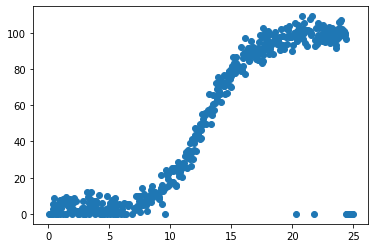

In [3]:
#using numpy arrays to strip the columns to arrays
numpy_array = df.to_numpy()
x = numpy_array
# plotting the data set.
plt.plot(x[:,0], x[:,1], 'o')

The data set shows a curve trajecoty with a linear progression in the data set noticeable on first view.

### Plotting the Data Set using seaborn.pairplot()

Seaborn packages allow further plotting and representation fo the data in better graphical formats that matplotlib's plots as shown above. 

Below are a series of seaborn plots. The first is a distribution plot of the entire data set values and it is clearly varying on both sub sets power and speed and we can further analyze these in separate graphs in the following example.

c:\users\suppo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


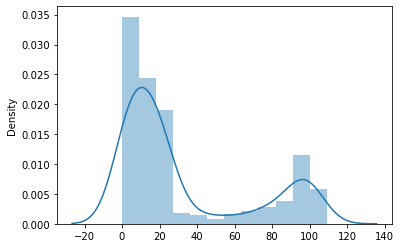

In [4]:
# using seaborn as sns to output distribution plot
sns.distplot(df)

The seaborn pairplot() functions splits the sub sets into both histograms and scatter plots and show a full picture of the speed versus power. 

With the wind speed mapping on to the wind power the graphs show that wind speed can clearly impact wind power, as would be expected.

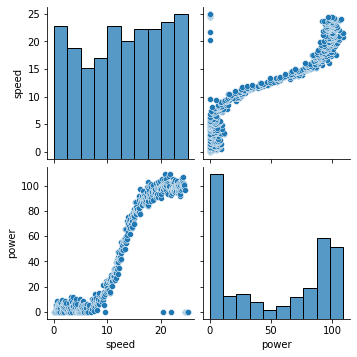

In [5]:
sns.pairplot(df)
#saving file for displaying the graphical output of the dataset.
plt.savefig('pairplot.png')

The seaborn regplot() allows map speed on the x axis and power on the y axis with a simple linear regression plot. This shows that the models most fitting for the analysis of this dataset would be to perform machine models on linear regression.

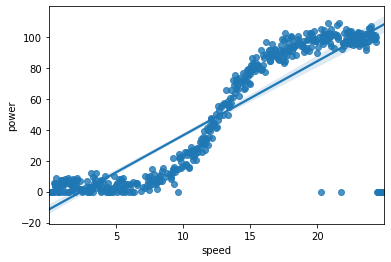

In [6]:
# seaborns regression plot showing the linear nature of the dataset
sns.regplot(x="speed", y="power", data=df)

The models chosen for this assignment in analyzing the powerproduction data set are Sci-kit Learn's and Keras' linear regression machine learning models.

## skLearn Model
### Importing Linear Model functions

Scikit learn is a commonly used python compatible package for machine learning models around regression, classification, clustering and more and for this model generation its linear_model module is going to be used for predicting the linear nature of the power production dataset.

In [7]:
# importing scikit learns linear model package 
#for calculating linear regression
import sklearn.linear_model as lin

### Preprocessing Data

To model the set we can strip the data set into separate numpy arrays using the pandas dataframe dropna() function. The arrays are split into x and y with x being the primary set being used hereafter for predict or mappting on to the data in the power sub set. The numpy array is then reshaped as part of the stripping using the reshape() function.

In [8]:
# splitting the data set into separate arrays
windspeed = df[["speed", "power"]].dropna()
x = windspeed["speed"].to_numpy()
y = windspeed["power"].to_numpy()

x = x.reshape(-1, 1)

The newly shaped x will now be used for modelling the linear regression.

### Model

The model is simply to be called with the sci-kit learn LinerarRegression function. It is then fitted to the x, y arrays.

In [9]:
model = lin.LinearRegression()
model.fit(x, y)

LinearRegression()

The model intercept is the mean value of Y when x = 0 and as such we can see it outlined below.

In [10]:
i = model.intercept_
i

-11.498929411767072

The model coefficients are beneficial for highlighting the potential change in the mean response when there are changes in the data, providing all other elements remain the same. The model coefficients for this dataset output as 4.79* as seen.

In [11]:
c = model.coef_
c

array([4.79252047])

The model score is a relatively high 0.73* considering the optimum is 1.0 and shows the consideration for linear regression in this dataset may be justified.

In [12]:
r= model.score(x, y)
r

0.7277077554596567

### Predicting the Data Set

The next step is to formulate the predict function which is a function that will input the X array for speed and use p as outlined below. P is a 2D array of the models intercept and coefficient as outlined above. P is passed through function and multiplied with the parameters of the user inputted X and then added to itself to produce a prediction on the Y value. 

In [13]:
p = [model.intercept_, model.coef_[0]]
p

[-11.498929411767072, 4.792520474329507]

In [14]:
def f(x, p):
    return p[0] + x * p[1]

Passing the parameter 16.0 into the new function outputs a figure of 65.18*.

In [15]:
f(16.0, p)

65.18139817750503

This f function can be parsed into a further prediction function to validate it further. Looking at the plot printed previously it is clear that the function predicts the value in the Power dataset from the inputted speed very closely.

In [16]:
def predict(x):
       return f(x,p)

In [17]:
print(predict(16.0))
print(predict(20.0))
print(predict(25.0))

65.18139817750503
84.35148007482306
108.3140824464706


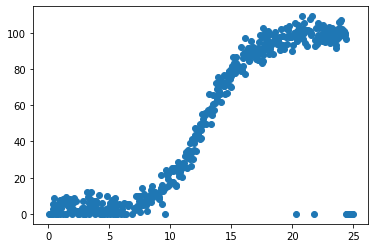

In [18]:
plt.plot(x, y, 'o')

## Keras Model
### Preprocessing
### Splitting the Data Set

For the second example we can split the data set into a 80/20 split for a train/test model style. Splitting the data sets allows a further testing of the algorithm to see it accuracies with reduce randomised outputs.

Scikit Learn has a model_selection module that enables split the data set, in this case the speed sub set from above as x.

In [19]:
#importing scikin model selection and train_test_split for splitting x.
from sklearn.model_selection import train_test_split
X_train20, X_test20 = train_test_split(x, test_size=0.20)

### Scaling the Data Set

We can then scaler this data to fit correctly using the StandardScaler() function within Scikit's preprocessing module. This optimised the data set for testing.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting the 80% Training to the scaler.
scaler.fit(X_train20)

StandardScaler()

### Forming Train and Test Data Sets

In [21]:
f = lambda x: 3.0 * x + 1.0

In [22]:
#transforming the train and test X sets into the new Y sets for modelling.
X_train = scaler.transform(X_train20)
X_test = scaler.transform(X_test20)
Y_train = f(X_train)
Y_test = f(X_test)

### Model

In [23]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
13/13 [==============================] - 2s 2ms/step - loss: 5.1051
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 5.1708
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 5.2104
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 4.8270
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 4.6532
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 4.3447
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 4.5014
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 4.1508
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 4.6926
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 4.4352
Epoch 11/300
13/13 [==============================] - 0s 3ms/step - loss: 4.1730
Epoch 12/300
13/13 [==============================] - 0s 2ms/step - loss: 4.2073
Epoch 13/300
13/13 [=================

13/13 [==============================] - 0s 2ms/step - loss: 0.8581
Epoch 103/300
13/13 [==============================] - 0s 2ms/step - loss: 0.8712
Epoch 104/300
13/13 [==============================] - 0s 2ms/step - loss: 0.7932
Epoch 105/300
13/13 [==============================] - 0s 1ms/step - loss: 0.8142
Epoch 106/300
13/13 [==============================] - 0s 2ms/step - loss: 0.7798
Epoch 107/300
13/13 [==============================] - 0s 1ms/step - loss: 0.7626
Epoch 108/300
13/13 [==============================] - 0s 1ms/step - loss: 0.7404
Epoch 109/300
13/13 [==============================] - 0s 1ms/step - loss: 0.6910
Epoch 110/300
13/13 [==============================] - 0s 2ms/step - loss: 0.7589
Epoch 111/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6915
Epoch 112/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 113/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6918
Epoch 114/300
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.0628
Epoch 203/300
13/13 [==============================] - ETA: 0s - loss: 0.078 - 0s 2ms/step - loss: 0.0641
Epoch 204/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 205/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 206/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 207/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 208/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 209/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 210/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0477
Epoch 211/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 212/300
13/13 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 213/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 

### Testing the Train and Test Data Sets for Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error
pred_train_linreg = model(X_train)
np.sqrt(mean_squared_error(pred_train_linreg,Y_train))

0.02327479747575846

In [25]:
pred_test_linreg = model(X_test)
np.sqrt(mean_squared_error(pred_test_linreg,Y_test))

0.023232257037995196

In [26]:
pred_ytrain_linreg = model(Y_train)
np.sqrt(mean_squared_error(pred_ytrain_linreg,X_train))

8.871453027223238

In [27]:
pred_ytest_linreg = model(Y_test)
np.sqrt(mean_squared_error(pred_ytest_linreg,X_test))

9.302840472823357

### Plotting the Train and Test Data Sets

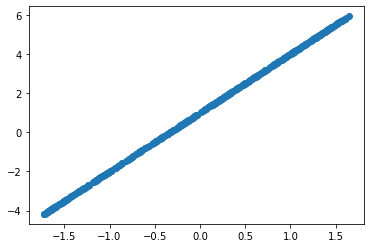

In [28]:
plt.scatter(X_train, Y_train)

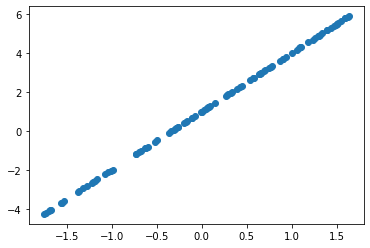

In [29]:
plt.scatter(X_test, Y_test)

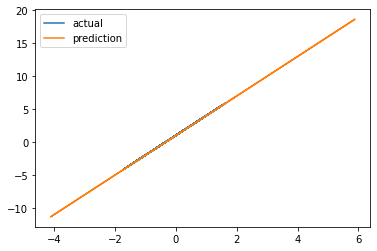

In [30]:
plt.plot(X_test, Y_test, label='actual')
plt.plot(model.predict(X_train), model.predict(Y_train), label='prediction')
plt.legend();

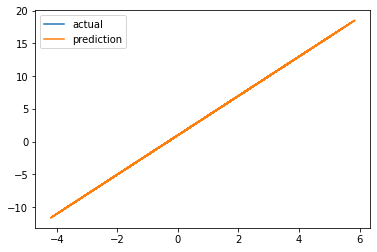

In [31]:
plt.plot(X_train, Y_train, label='actual')
plt.plot(model.predict(X_test), model.predict(Y_test), label='prediction')
plt.legend();

### Model Predicting using 4 Sample Points

In [32]:
model.predict([5.0,10.0,15.0,20.0])

array([[15.883708],
       [30.767334],
       [45.65096 ],
       [60.534588]], dtype=float32)

In [33]:
np.array([[f(i)] for i in [5.0, 10.0, 15.0, 20.0]])

array([[16.],
       [31.],
       [46.],
       [61.]])

### Evaluating the Model on Test and Training Sets

In [34]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 5.3974e-04


0.0005397367640398443

In [35]:
model.evaluate(X_train, Y_train)

13/13 [==============================] - 0s 1ms/step - loss: 5.4172e-04


0.0005417164647951722

### Conclusion

It is clear that the power production data set has a tendency for linear progression in that wind speed is a direct factor in the increase in wind power for the most part. This generally expected behaviour allowed the creation of two linear regression models on the wind speed sub set that tend to predict accurately the wind power and progress correctly using the Scikit and Keras packages. 

The functions will now be included in a webservice and hosted on docker as per this assignement.


### References
Course content and resources.
1. GMIT (2018) “Quality assurance framework,” Accessed online at: https://www.gmit.ie/general/quality-assurance-framework.
2. I. McLoughlin (2020) “Using git for assessments,”. Accessed online at: https://github.com/ianmcloughlin/using-git-for-assessments/.
3. Sk Learn (2020) Supervised Learning Documentation. Accessed online at: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
4. w3schools (2020) Tutorials. Access online at: https://www.w3schools.com/
5. StackOverflow (2020) Various Stack Overflow Queries. Accessed online at: https://stackoverflow.com/
6. DataCamp (2020) Turning Machine Learning Models into APIs in Python. Accessed online at: https://www.datacamp.com/community/tutorials/machine-learning-models-api-python#comments
7. Keras (2020) Developer guides. Accessed online at: https://keras.io/guides/
8. Brownlee, J. (2016) Save and Load Machine Learning Models in Python with scikit-learn. Accessed online at: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
9. Brownlee, J (2017) How to Train a Final Machine Learning Model. Accessed online at: https://machinelearningmastery.com/train-final-machine-learning-model/
10. Brownlee, J (2018) How to Make Predictions with scikit-learn. Accessed online at: https://machinelearningmastery.com/make-predictions-scikit-learn/
11. Docker Docs (2020) Docker Build Documentation. Accessed online at: https://docs.docker.com/engine/reference/commandline/build/